# Anime Recommendation: Data Processing

## Overview
This project aims to build an anime recommendation system for new members and current subscribers of an anime streaming service. New members can use a content-based approach to receive recommendations based on a show they may have watched or heard of previosuly. For current subscribers, collaborative filtering is used by comparing the users' ratings and returning shows similar users have rated similarly. 

## Business Understanding

The anime industry is a rapidly growing market, with new shows being released all the time. This can make it difficult for anime fans to find new shows to watch that they will enjoy. Additionally, most streaming services do not offer personalized recommendations, which can lead to users wasting time scrolling through an endless list of shows that they are not interested in.
With this project, I aim to build a recommendation system that will help anime fans discover new shows that they will enjoy. The recommendation system will use a variety of factors to make recommendations, including the user's past viewing history, the user's ratings of other shows, and the user's genre preferences. 
This recommendation system  will give a curated list to its users based on content preference and similar user's pick that will save time and provide a superb experience both novel and familiar to users. 


## Data Understanding



## Data Preparation



In [1]:
# basic imports for EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import seaborn as sns
import re
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing datasets
anime_df = pd.read_csv('Data/anime.csv')
ratings_df = pd.read_csv('Data/rating.csv')

In [3]:
# looking into anime df
display(anime_df.head())
display(anime_df.info())
display(anime_df.describe())
display(anime_df.describe(include='object'))

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


None

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


From the metadata, I can see there some nulls in a few columns that have to be removed or imputed.

In [4]:
# checking for duplicates
anime_df.duplicated().value_counts()

False    12294
dtype: int64

In [5]:
# checking for nulls 
anime_df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [6]:
# dropping nulls
anime_df = anime_df.dropna()

In [7]:
# check
anime_df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [8]:
anime_df.shape

(12017, 7)

After dropping duplicates and nulls, the dataset now has 12,017 rows for analysis. 

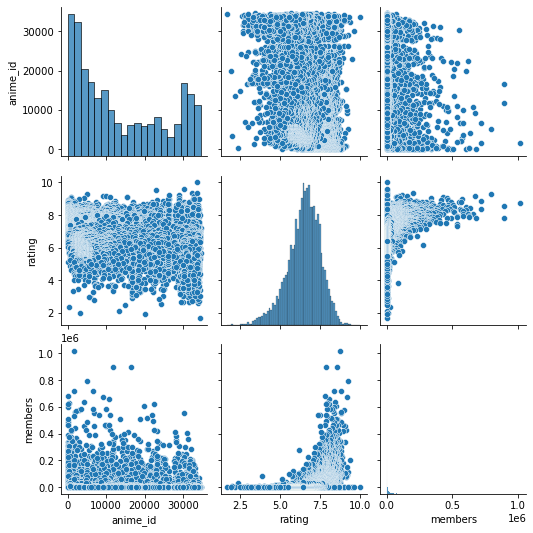

In [9]:
# visualizing features
sns.pairplot(anime_df)

In [10]:
# sorting by members
top_10_mem = anime_df.sort_values(by='members', ascending=False).head(10)
top_10_mem

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


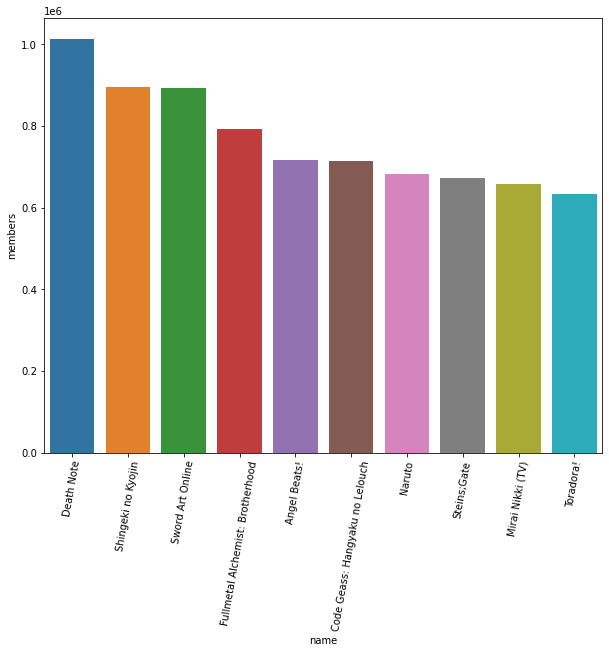

In [12]:
# visualizing top ten popular/members shows
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=top_10_mem, x='name', y='members')
plt.xticks(rotation=80);

In [17]:
# sorting by score
top_10_rating = anime_df.sort_values(by='rating', ascending=False).head(10)
top_10_rating

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


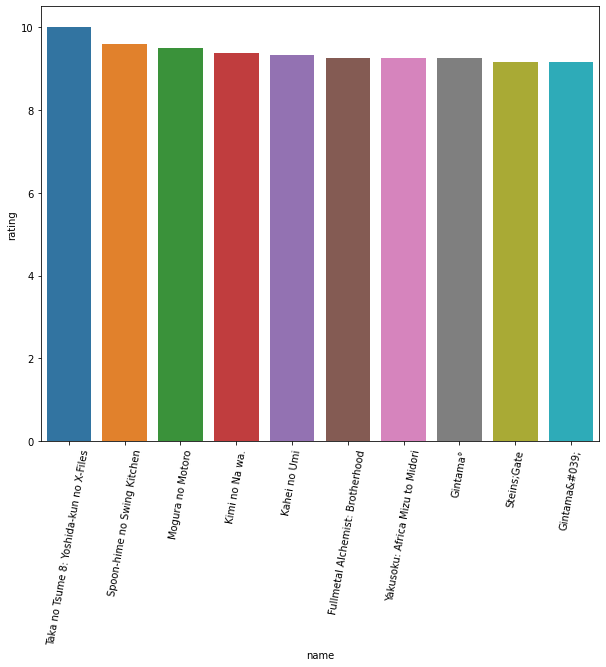

In [18]:
# visualizing by score
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=top_10_rating, x='name', y='rating')
plt.xticks(rotation=80);

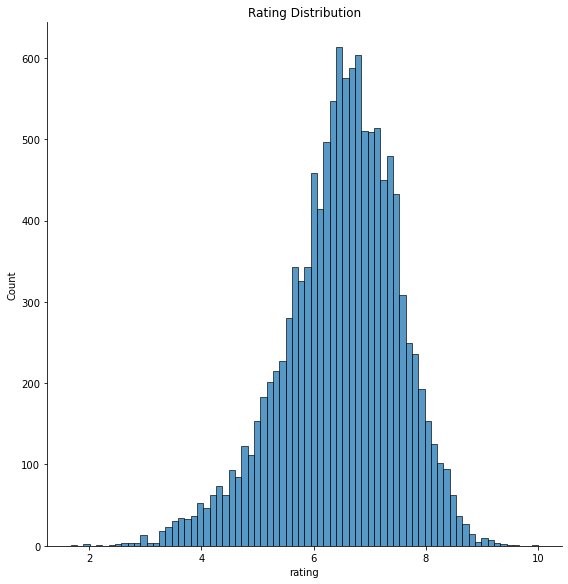

In [20]:
sns.displot(data=anime_df, x='rating', kind='hist', height=8)
plt.title('Rating Distribution')
plt.show;

From the above visuals, we can see the most popular animes based on the number of members as well as the top scored shows, which are normally distributed. 

In [28]:
# looking at genre column
anime_df['genre'].value_counts()

Hentai                                                             816
Comedy                                                             521
Music                                                              297
Kids                                                               197
Comedy, Slice of Life                                              174
                                                                  ... 
Drama, Parody, Shoujo                                                1
Comedy, Sci-Fi, Shounen, Super Power                                 1
Adventure, Drama, Mystery, Slice of Life                             1
Comedy, Mystery, Parody, Romance, School, Sci-Fi, Slice of Life      1
Drama, Historical, Seinen                                            1
Name: genre, Length: 3229, dtype: int64

In [31]:
# import to ohe genre column
from sklearn.preprocessing import MultiLabelBinarizer

In [32]:
# isntantiating binarizer
binarizer = MultiLabelBinarizer()

In [33]:
# saving results to merge with original dataset
results = binarizer.fit_transform(anime_df['genre'])

In [34]:
# creating and saving new dataset for content based model
genre_df = anime_df.join(pd.DataFrame(results, index=anime_df.index, columns=binarizer.classes_))
genre_df

,anime_id,name,genre,type,episodes,rating,members,,",",-,...,n,o,p,r,s,t,u,v,w,y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1,1,0,...,1,1,1,1,0,1,1,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,1,1,0,1,1,1,1,1,0,1
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,1,1,...,1,1,0,1,1,1,1,0,0,1
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,1,1,1,...,0,0,0,1,0,0,0,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,1,1,...,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,0,0,0,...,1,0,0,0,0,1,0,0,0,0
12290,5543,Under World,Hentai,OVA,1,4.28,183,0,0,0,...,1,0,0,0,0,1,0,0,0,0
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,0,0,0,...,1,0,0,0,0,1,0,0,0,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [35]:
anime_df.to_csv('Data/anime_cleaned.csv')

In [36]:
genre_df.to_csv('Data/one_hot_genre.csv')

## Reviews Dataset

In [38]:
# looking into reviews df
display(ratings_df.head())
display(ratings_df.info())
display(ratings_df.describe())

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


None

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [40]:
ratings_df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [42]:
# looking into scores
ratings_df['rating'].value_counts().sort_values()

 1       16649
 2       23150
 3       41453
 4      104291
 5      282806
 6      637775
 10     955715
 9     1254096
 7     1375287
-1     1476496
 8     1646019
Name: rating, dtype: int64

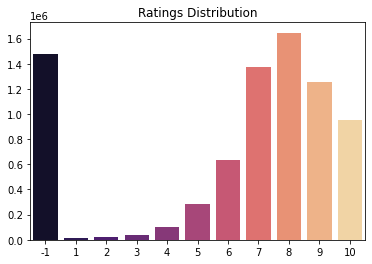

In [44]:
count = ratings_df['rating'].value_counts().sort_index()

sns.barplot(x=count.index,
            y=count.values,
            palette='magma').set_title('Ratings Distribution');

In [46]:
ratings_df.loc[ratings_df['rating']==-1]

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813628,73515,2385,-1
7813629,73515,2386,-1
7813631,73515,2490,-1
7813635,73515,2680,-1


In [49]:
ratings_df = ratings_df.loc[ratings_df['rating'] > -1]
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337241 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


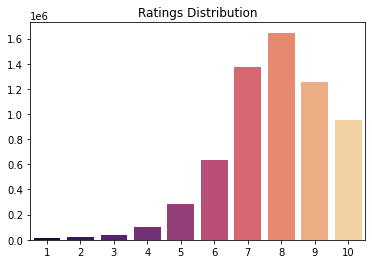

In [53]:
count = ratings_df['rating'].value_counts().sort_index()

sns.barplot(x=count.index,
            y=count.values,
            palette='magma').set_title('Ratings Distribution')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#plt.savefig('Images/ratings_dist.png', dpi=400);

In [56]:
# saving df to use for collaborative filtering
ratings_df.to_csv('Data/cleaned_reviews.csv')

After cleaning both datasets, I will build a content-based and collaboritve filtering models in separte notebooks. 